In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [3]:
data = pd.read_csv('/content/insurance - insurance.csv')

In [4]:
data.dropna(inplace=True)

In [5]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [6]:
# Define the features (X) and target variable (y)
X = data[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y = data['charges']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [10]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
rss = np.sum((y_pred - y_test) ** 2)
explained_variance = explained_variance_score(y_test, y_pred)

In [11]:
# Calculate adjusted R-squared
n = len(X_test)
k = len(X_test.columns)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [12]:
# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) score:", r2)
print("Adjusted R-squared score:", adj_r2)
print("Residual Sum of Squares (RSS):", rss)
print("Explained Variance Score:", explained_variance)

Mean Absolute Error (MAE): 4181.19447375365
Mean Squared Error (MSE): 33596915.85136145
Root Mean Squared Error (RMSE): 5796.284659276273
R-squared (R2) score: 0.7835929767120724
Adjusted R-squared score: 0.7769085898923681
Residual Sum of Squares (RSS): 9003973448.16487
Explained Variance Score: 0.7839025861417649


In [13]:
# 4. Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("Feature Importance:")
print(feature_importance)


Feature Importance:
            Feature   Coefficient
4        smoker_yes  23651.128856
2          children    425.278784
1               bmi    337.092552
0               age    256.975706
3          sex_male    -18.591692
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354


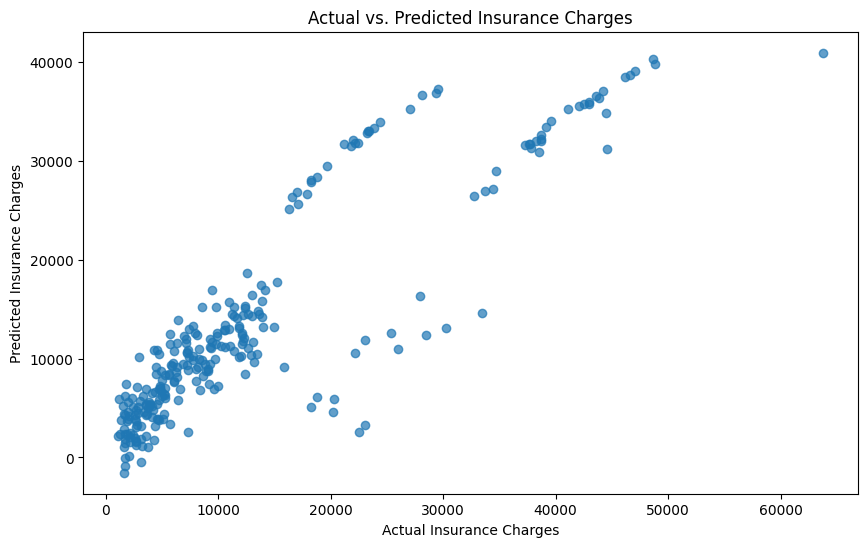

In [14]:
# 5. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.title("Actual vs. Predicted Insurance Charges")
plt.show()


In [15]:
recommendations = []
# Factors contributing most to higher costs
if feature_importance['Coefficient'].iloc[0] > 0:
    recommendations.append("Smoking significantly increases insurance costs. Quitting smoking can lead to substantial savings.")
if feature_importance['Coefficient'].iloc[1] > 0:
    recommendations.append("Higher BMI is associated with higher insurance costs. Maintaining a healthy weight may reduce costs.")
if feature_importance['Coefficient'].iloc[2] > 0:
    recommendations.append("Having more children can increase insurance costs. Consider family planning.")
# Add more recommendations based on other features

# Factors contributing most to lower costs
if feature_importance['Coefficient'].iloc[-1] < 0:
    recommendations.append("Being female is associated with lower insurance costs.")
# Add more recommendations based on other features

In [16]:
print("\nRecommendations:")
if recommendations:
    for idx, recommendation in enumerate(recommendations):
        print(f"{idx + 1}. {recommendation}")
else:
    print("No specific recommendations based on the model.")


Recommendations:
1. Smoking significantly increases insurance costs. Quitting smoking can lead to substantial savings.
2. Higher BMI is associated with higher insurance costs. Maintaining a healthy weight may reduce costs.
3. Having more children can increase insurance costs. Consider family planning.
4. Being female is associated with lower insurance costs.
